# PR-22e-09 - Evaluation
### $G  = 0.05\,G_0$
### $\tau_i = \{0.05\}$

- S2b: 0.051 G_0	magnet	HIV-Map-22	False	2023-10-27_HIV_tunnel_contact	2023-10-27_HIV_tunnel_contact_1.hdf5

- S2b: 0.051 G_0	microwave	MWIV-Map-41	False	2023-10-27_HIV_tunnel_contact	2023-10-27_HIV_tunnel_contact_1.hdf5

- S2b: 0.051 G_0	power	PMWIV-Map-25	False	2023-10-27_HIV_tunnel_contact	2023-10-27_HIV_tunnel_contact_1.hdf5

Apparently "frequency_at_-25dBm" is crossed out in table of patrick.

In [1]:
# initialize stuff
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import importlib
import logging

import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")
sys.path.append("/home/oliver/Documents/p5control-bluefors-evaluation")

from utilities.baseclass import BaseClass
from utilities.baseevaluation import BaseEvaluation
from utilities.baseplot import BasePlot
from utilities.ivevaluation import IVEvaluation

importlib.reload(sys.modules["utilities.baseclass"])
importlib.reload(sys.modules["utilities.baseevaluation"])
importlib.reload(sys.modules["utilities.baseplot"])
importlib.reload(sys.modules["utilities.ivevaluation"])

import utilities.basefunctions
importlib.reload(sys.modules["utilities.basefunctions"])

from utilities.corporate_design_colors_v4 import cmap
importlib.reload(sys.modules["utilities.corporate_design_colors_v4"])

importlib.reload(logging)
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO, format="%(message)s")
# pip install numpy matplotlib scipy tqdm torch hdf5view h5py PySide6

In [ ]:
# Settings of Evaluation
from utilities.ivevaluation import IVEvaluation

importlib.reload(sys.modules["utilities.ivevaluation"])

eva = IVEvaluation()
eva.file_directory = "/Volumes/speedyboy/atomic-contact/"
eva.file_folder = "0.05 G_0/"
eva.setAmplifications(1000, 10000)
eva.setV(2.3e-3, voltage_bins=1000)
eva.setI(9e-9, current_bins=1000)
eva.downsample_frequency = 43

eva.file_name = "2023-10-27_HIV_tunnel_contact_1.hdf5"
eva.showMeasurements()

(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base eva) Available measurements:
- "critical field"
- "frequency_at_-20dBm"
- "frequency_at_15GHz"


In [ ]:
# Hard Evaluation
# Frequency Study (0.03V, Stripline)
eva.title = "Frequency Study (0.03V, Stripline)"
print(eva.title)
eva.sub_folder = "frequency study"
eva.setMeasurement("frequency_at_-20dBm")
eva.showKeys()
eva.setKeys(index_0=3, index_1=-3, norm=1e9)
(eva.up_sweep,) = eva.getMaps([1])
eva.saveData()

# Amplitude Study (15GHz, Stripline)
eva.title = "Amplitude Study (15GHz, Stripline)"
print(eva.title)
eva.sub_folder = "amplitude study"
eva.setMeasurement("frequency_at_15GHz")
eva.showKeys()
eva.setKeys(index_0=3, index_1=-3, norm=1)
eva.addKey("nu=-31.0dBm", -1000)
(eva.up_sweep,) = eva.getMaps([1])
eva.setA(0, 0.25, 250)
(eva.up_sweep,) = eva.getMapsAmplitude([eva.up_sweep])
eva.y_axis = eva.amplitude_axis
eva.saveData()

# Magnetic Field Study (Stripline)
eva.title = "Magnetic Field Study (Stripline)"
print(eva.title)
eva.sub_folder = "magnetic field study"
eva.setMeasurement("critical field")
eva.showKeys()
eva.setKeys(index_0=3, index_1=-2, norm=1e-3)
(eva.up_sweep,) = eva.getMaps([1])
eva.saveData()

(base) Frequency Study (0.03V, Stripline)


(base eva) Measurement keys preview: ['nu=0.000GHz', 'nu=0.100GHz', 'nu=9.800GHz', 'nu=9.900GHz']
(iv eva) getBackupTemperature()


Frequency Study (0.03V, Stripline)


100%|██████████| 201/201 [01:14<00:00,  2.69it/s]
(base) saveData()
(base) Amplitude Study (15GHz, Stripline)
(base eva) Measurement keys preview: ['nu=-1.0dBm', 'nu=-10.0dBm', 'nu=-9.0dBm', 'nu=0.0dBm']


Amplitude Study (15GHz, Stripline)


100%|██████████| 33/33 [00:14<00:00,  2.21it/s]
(iv eva) getMapsAmplitude()
(base) saveData()
(base) Magnetic Field Study (Stripline)
(base eva) Measurement keys preview: ['uH=+0.00mT', 'uH=+0.25mT', 'uH=-9.50mT', 'uH=-9.75mT']


Magnetic Field Study (Stripline)


100%|██████████| 241/241 [01:04<00:00,  3.74it/s]
(base) saveData()


(base) ... BaseClass initialized.
(base eva) ... BaseEvaluation initialized.
(iv eva) ... IVEvaluation initialized.
(base) ... BaseClass initialized.
(base plot) ... BasePlot initialized.
(iv plot) ... IVPlot initialized.
(base) Frequency Study (0.03V, Stripline)
(base) loadData()
(iv plot) smoothing = True
(iv plot) window_length = 5
(base plot) saveFigure()
(base plot) saveFigure()
(base plot) saveFigure()
(base plot) saveFigure()
(base) Amplitude Study (15GHz, Stripline)
(base) loadData()
(iv plot) smoothing = True
(iv plot) window_length = 5


Amplitude Study (15GHz, Stripline)


(base plot) saveFigure()
(base plot) saveFigure()
(base plot) saveFigure()
(base plot) saveFigure()
(base) Magnetic Field Study (Stripline)
(base) loadData()
(iv plot) smoothing = True
(iv plot) window_length = 5
(base plot) saveFigure()
(base plot) saveFigure()
(base plot) saveFigure()
(base plot) saveFigure()


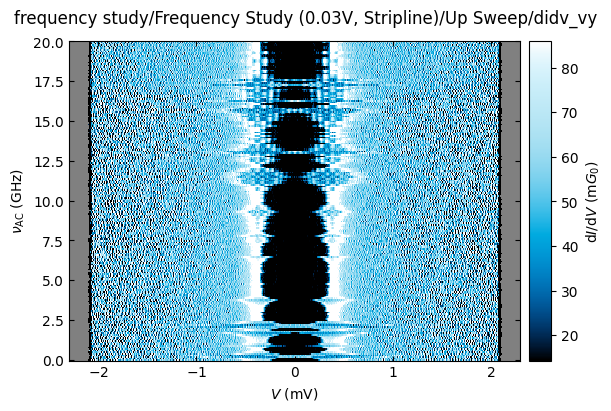

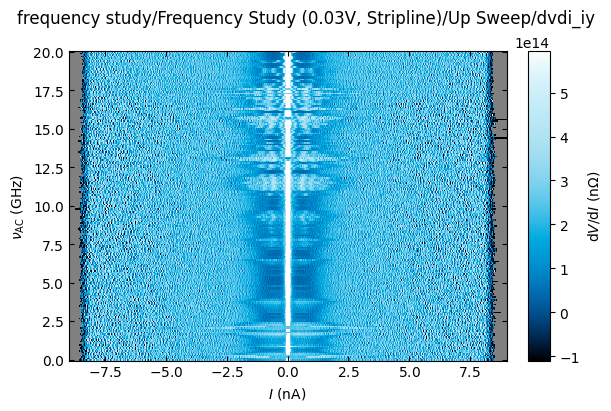

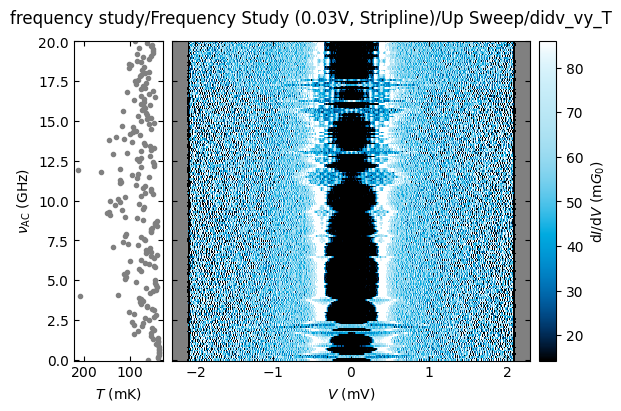

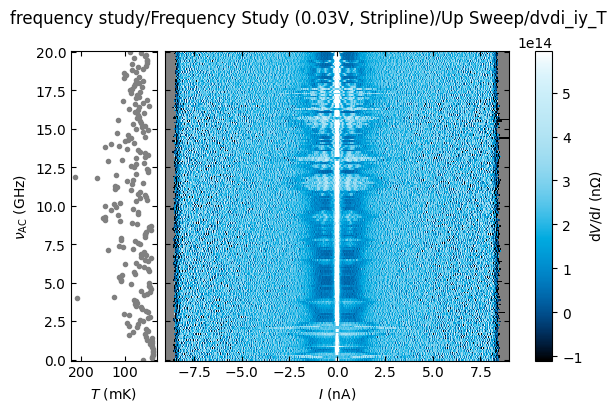

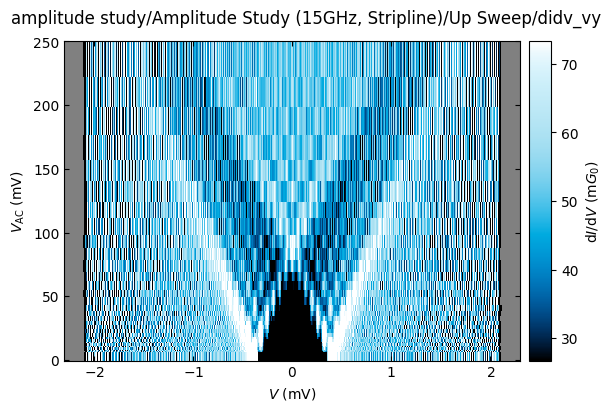

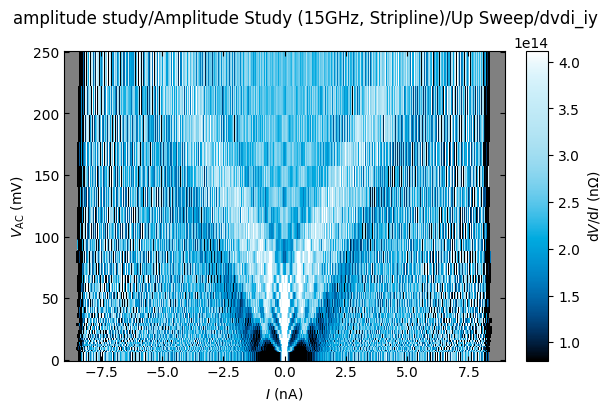

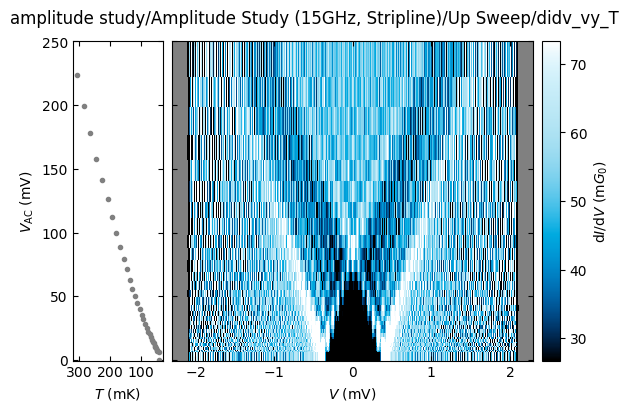

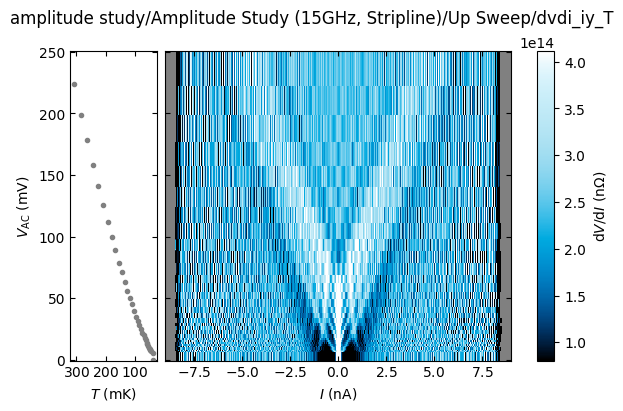

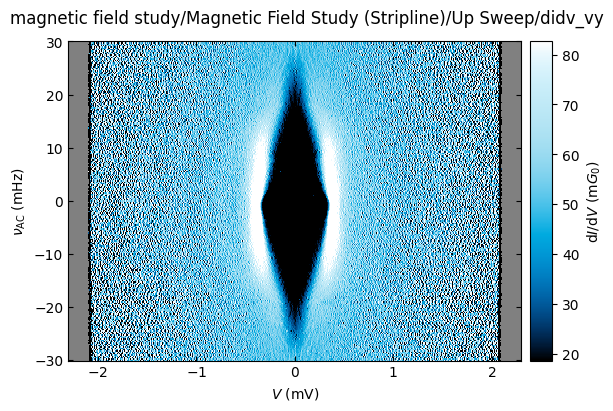

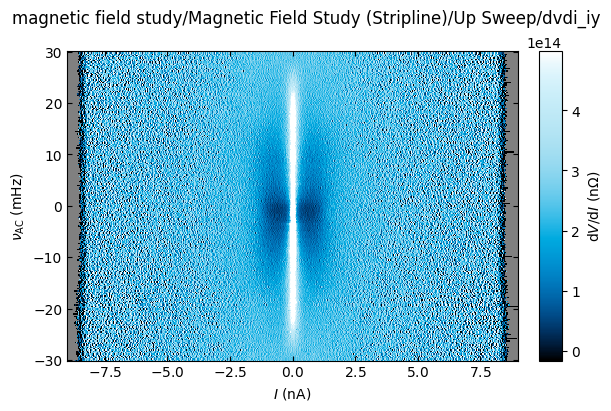

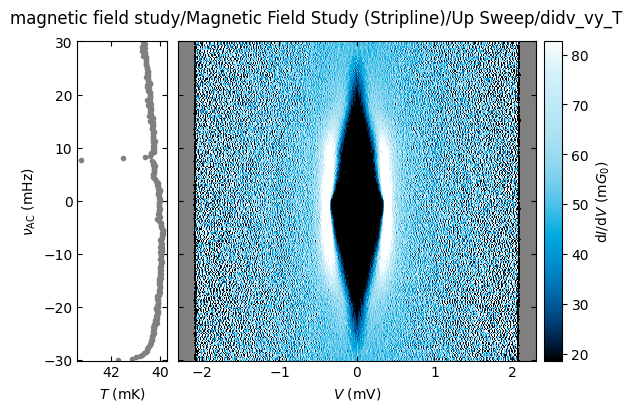

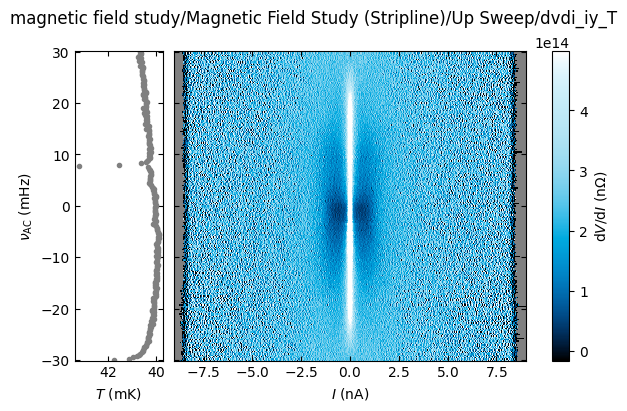

In [5]:
# Execute All IVPlotting
%matplotlib inline
from utilities.ivplot import IVPlot
importlib.reload(sys.modules["utilities.ivplot"])
eva = IVPlot()

eva.title = "Frequency Study (0.03V, Stripline)"
eva.sub_folder = "frequency study"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.y_characters = [r"$\nu_\mathrm{AC}$", "Hz"]
eva.smoothing = True
eva.window_length = 5
eva.plot_T = False
eva.plot_all()
eva.plot_T = True
eva.plot_all()

eva.title = "Amplitude Study (15GHz, Stripline)"
print(eva.title)
eva.sub_folder = "amplitude study"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.y_characters = [r"$V_\mathrm{AC}$", "V"]
eva.smoothing = True
eva.window_length = 5
eva.plot_T = False
eva.plot_all()
eva.plot_T = True
eva.plot_all()

eva.title = "Magnetic Field Study (Stripline)"
eva.sub_folder = "magnetic field study"
eva.loadData()
eva.to_plot = eva.up_sweep
eva.title_of_plot = "Up Sweep"
eva.y_characters = [r"$\nu_\mathrm{AC}$", "Hz"]
eva.smoothing = True
eva.window_length = 5
eva.plot_T = False
eva.plot_all()
eva.plot_T = True
eva.plot_all()